In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=url, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
zip_base = os.path.dirname(zip)
!find $zip_dir_base -type d -print

.
./.config
./.config/logs
./.config/logs/2021.04.07
./.config/configurations
./sample_data


In [ ]:
zip_base_full = os.path.join(os.path.dirname(zip), 'cats_and_dogs_filtered')
zip_train = os.path.join(zip_base_full, 'train')
zip_val = os.path.join(zip_base_full, 'validation')

zip_train_cats = os.path.join(zip_train, 'cats')
zip_train_dogs = os.path.join(zip_train, 'dogs')
zip_val_cats = os.path.join(zip_val, 'cats')
zip_val_dogs = os.path.join(zip_val, 'dogs')

In [42]:
len_cats_train = len(os.listdir(zip_train_cats))
len_dogs_train = len(os.listdir(zip_train_dogs))
len_cats_val = len(os.listdir(zip_val_cats))
len_dogs_val = len(os.listdir(zip_val_dogs))

total_train = len_cats_train + len_dogs_train
total_val = len_dogs_val + len_cats_val


In [43]:
print("The number of cats in training data:",len_cats_train)
print("The number of dogs in training data:",len_dogs_train)
print("The number of cats in validation data:",len_cats_val)
print("The number of dogs in validation data:",len_dogs_val)

The number of cats in training data: 1000
The number of dogs in training data: 1000
The number of cats in validation data: 500
The number of dogs in validation data: 500


In [44]:
batch_size = 100
image_shape = 150

In [45]:
rescale_train = ImageDataGenerator(rescale=1.0/255)
rescale_val = ImageDataGenerator(rescale=1.0/255)

In [46]:
train_gen = rescale_train.flow_from_directory(batch_size=batch_size,
                                              directory=zip_train,
                                              shuffle=True,
                                              target_size=(image_shape,image_shape),
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [47]:
val_gen = rescale_val.flow_from_directory(batch_size=batch_size,
                                              directory=zip_val,
                                              shuffle=True,
                                              target_size=(image_shape,image_shape),
                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [48]:
sample_training, _ = next(train_gen)

In [49]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [56]:
EPOCHS = 2
history = model.fit_generator(
    train_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=EPOCHS,
    validation_data=val_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
20/20 [==============================] - 100s 5s/step - loss: 0.6828 - accuracy: 0.5480 - val_loss: 0.6497 - val_accuracy: 0.6170
Epoch 2/2
20/20 [==============================] - 99s 5s/step - loss: 0.6515 - accuracy: 0.6145 - val_loss: 0.6257 - val_accuracy: 0.6230


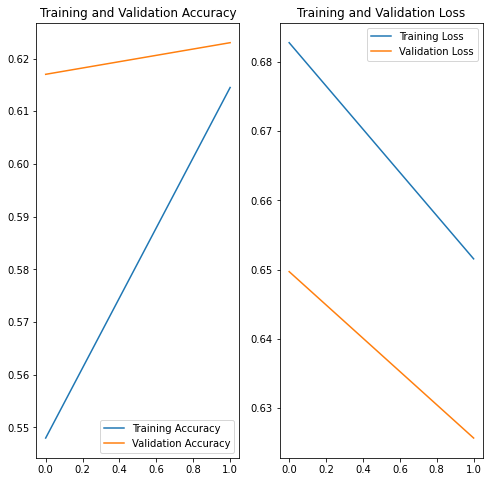

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()